# Sign Language Classification

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Sign_language_dataset/archive/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Sign_language_dataset/archive/sign_mnist_test.csv')

In [ ]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = train_df.values
x_test = test_df.values
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

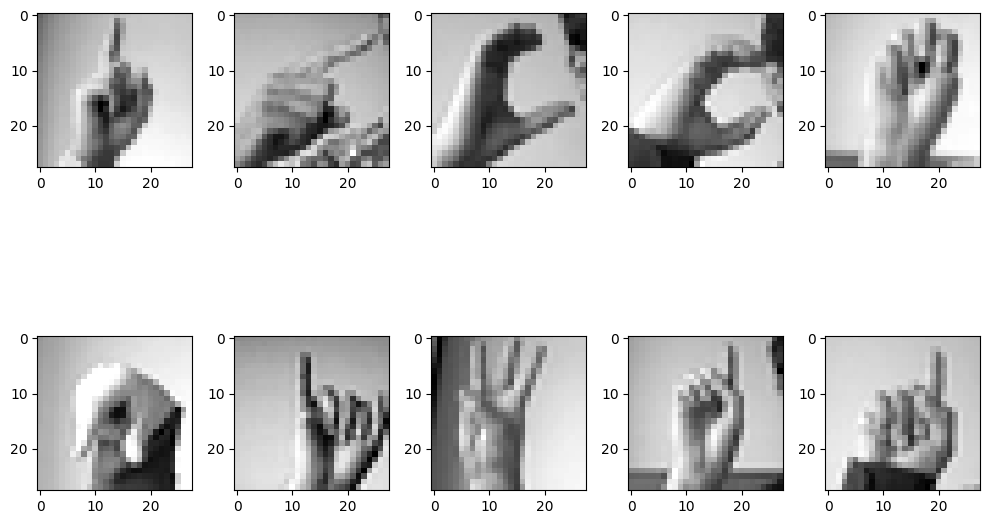

In [ ]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

# Building a Convolutional Neural Network

### 1. Building CNN architecture

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 512)               25690624  
                                                                 
 dense_1 (Dense)             (None, 24)                12312     
                                                                 
Total params: 25703832 (98.05 MB)
Trainable params: 25703704 (98.05 MB)
Non-trainable params: 128 (512.00 Byte)
__________

In [ ]:

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
fitted_values1 = model.fit(x_train, y_train,
                          batch_size=128,
                          epochs = 5,
                          validation_data = (x_test, y_test),
                          callbacks = [learning_rate_reduction])

Epoch 1/5
215/215 [==============================] - 315s 1s/step - loss: 0.6816 - accuracy: 0.8995 - val_loss: 1.7883 - val_accuracy: 0.6154 - lr: 0.0010
Epoch 2/5
215/215 [==============================] - 326s 2s/step - loss: 9.6327e-04 - accuracy: 1.0000 - val_loss: 0.8906 - val_accuracy: 0.7644 - lr: 0.0010
Epoch 3/5
215/215 [==============================] - 324s 2s/step - loss: 2.4436e-04 - accuracy: 1.0000 - val_loss: 0.9073 - val_accuracy: 0.7764 - lr: 0.0010
Epoch 4/5
215/215 [==============================] - 313s 1s/step - loss: 1.0263e-04 - accuracy: 1.0000 - val_loss: 1.1352 - val_accuracy: 0.7755 - lr: 0.0010
Epoch 5/5
215/215 [==============================] - 379s 2s/step - loss: 4.9225e-05 - accuracy: 1.0000 - val_loss: 1.2261 - val_accuracy: 0.7769 - lr: 0.0010


In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 [==============================] - 18s 79ms/step - loss: 1.2261 - accuracy: 0.7769
Accuracy of the model is -  77.69101858139038 %


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
fitted_values2 = model.fit(x_train, y_train,
                          batch_size=128,
                          epochs = 5,
                          validation_data = (x_test, y_test),
                          callbacks = [learning_rate_reduction])

Epoch 1/5
215/215 [==============================] - 97s 422ms/step - loss: 0.5354 - accuracy: 0.8433 - val_loss: 2.8503 - val_accuracy: 0.0890 - lr: 0.0010
Epoch 2/5
215/215 [==============================] - 88s 409ms/step - loss: 0.0194 - accuracy: 0.9968 - val_loss: 0.6296 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 3/5
215/215 [==============================] - 87s 403ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.2305 - val_accuracy: 0.9253 - lr: 0.0010
Epoch 4/5
215/215 [==============================] - 98s 458ms/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 0.1647 - val_accuracy: 0.9469 - lr: 0.0010
Epoch 5/5
215/215 [==============================] - 90s 418ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.2203 - val_accuracy: 0.9303 - lr: 0.0010


In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 [==============================] - 5s 22ms/step - loss: 0.2203 - accuracy: 0.9303
Accuracy of the model is -  93.02844405174255 %


### 3.CNN + Data Augmentation

In [ ]:
image_generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)


image_generator.fit(x_train)

In [ ]:
fitted_values3 = model.fit(image_generator.flow(x_train,y_train, batch_size = 128) ,
                    epochs = 5,
                    validation_data = (x_test, y_test) ,
                    callbacks = [learning_rate_reduction])

Epoch 1/5
215/215 [==============================] - 103s 470ms/step - loss: 0.3101 - accuracy: 0.9051 - val_loss: 0.0664 - val_accuracy: 0.9760 - lr: 0.0010
Epoch 2/5
215/215 [==============================] - 101s 470ms/step - loss: 0.0801 - accuracy: 0.9737 - val_loss: 0.0872 - val_accuracy: 0.9721 - lr: 0.0010
Epoch 3/5
215/215 [==============================] - 101s 467ms/step - loss: 0.0484 - accuracy: 0.9845 - val_loss: 0.0396 - val_accuracy: 0.9904 - lr: 0.0010
Epoch 4/5
215/215 [==============================] - 105s 486ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0125 - val_accuracy: 0.9958 - lr: 0.0010
Epoch 5/5
215/215 [==============================] - 99s 460ms/step - loss: 0.0321 - accuracy: 0.9892 - val_loss: 0.0160 - val_accuracy: 0.9932 - lr: 0.0010


In [ ]:
print("Accuracy of the model with data augmentation is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 7s 30ms/step - loss: 0.0160 - accuracy: 0.9932
Accuracy of the model with data augmentation is -  99.31678771972656 %


### 4. CNN Model Valuation



In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
fitted_values4 = model.fit(image_generator.flow(x_train,y_train, batch_size = 128),
                           epochs = 20,
                           validation_data = (x_test, y_test) ,
                           callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 98s 449ms/step - loss: 0.8334 - accuracy: 0.7408 - val_loss: 3.4509 - val_accuracy: 0.0715 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 98s 457ms/step - loss: 0.1349 - accuracy: 0.9572 - val_loss: 1.4661 - val_accuracy: 0.5321 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 96s 446ms/step - loss: 0.0658 - accuracy: 0.9798 - val_loss: 0.0778 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 95s 442ms/step - loss: 0.0388 - accuracy: 0.9888 - val_loss: 0.0957 - val_accuracy: 0.9656 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9906
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 102s 476ms/step - loss: 0.0319 - accuracy: 0.9906 - val_loss: 0.1278 - val_accuracy: 0.9526 - lr: 0.0010
Epoch 6/20
215/215 [============================

In [ ]:
print("Accuracy of the model with data augmentation is  - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 [==============================] - 6s 25ms/step - loss: 0.0014 - accuracy: 0.9999
Accuracy of the model with data augmentation is  -  99.98605847358704 %


### Analysis

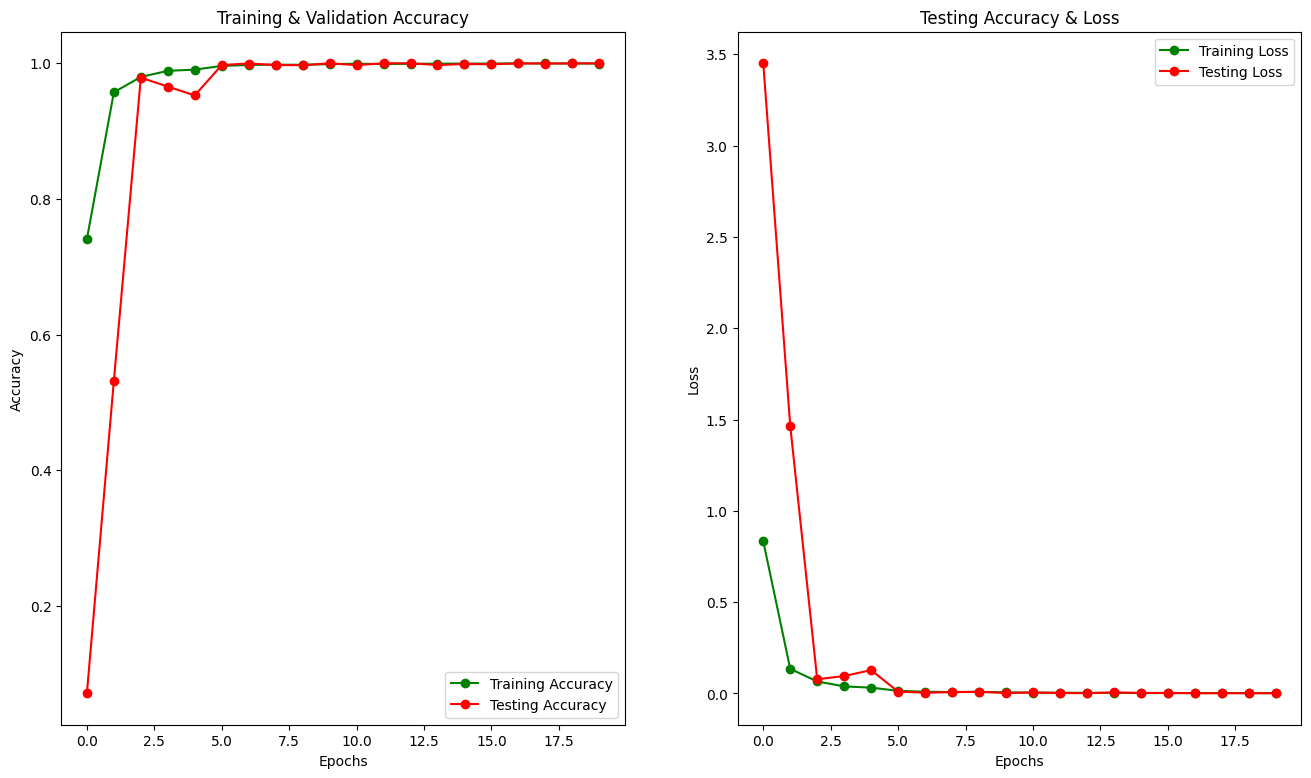

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = fitted_values4.history['accuracy']
train_loss = fitted_values4.history['loss']
val_acc = fitted_values4.history['val_accuracy']
val_loss = fitted_values4.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
#from tensorflow.keras.models import load_model

model.save("/content/drive/MyDrive/computer_vision/sign_language_cnn_model.h5")

#model.save("sign_language_cnn_model")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import classification_report

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/computer_vision/sign_language_cnn_model.h5')

In [ ]:
predictions = model.predict(x_test)

225/225 [==============================] - 10s 42ms/step


In [ ]:
y_test_flat = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test_flat, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       1.00      1.00      1.00       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
           9       1.00      1.00      1.00       331
          10       1.00      1.00      1.00       209
          11       1.00      1.00      1.00       394
          12       1.00      1.00      1.00       291
          13       1.00      1.00      1.00       246
          14       1.00      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16       1.00      1.00      1.00       144
          17       1.00    